In [1]:
clc
clear all

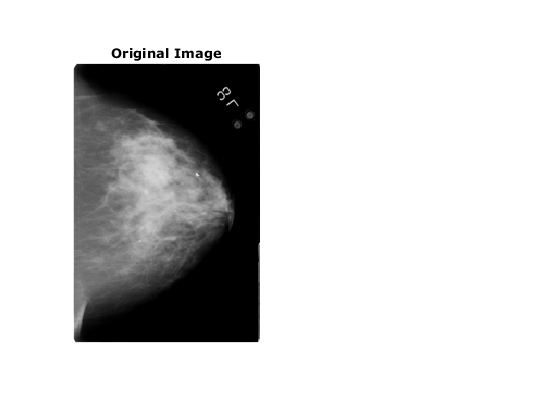

In [2]:
orig_img = dicomread('../../res/images/000000.dcm');
img = imresize(orig_img, [256, 172]);
%img = orig_img;
subplot(1, 2, 1)
imshow(img);
title('Original Image');

# Performing image processing

### homomorphic filtering, output: $G$

$I(x, y) \to log \to high\ pass\ filter \to exp \to I'(x, y)$

### Gaussian low pass filter:

$H(u, v) = e^{\dfrac{-D^2(u,v)}{2D_0^2}}$

where $D$ is:

$D(u,v)=\sqrt{(u-\frac{M}{2})^2 + (v-\frac{N}{2})^2}$

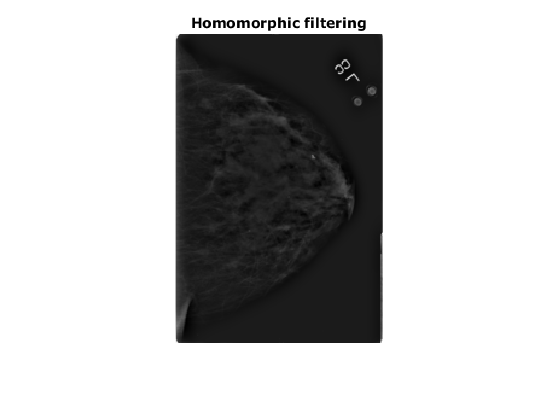

In [3]:
I = im2double(img);
I = log(1 + I);

M = 2*size(I,1) + 1;
N = 2*size(I,2) + 1;
sigma = 10;
[X, Y] = meshgrid(1:N,1:M);
centerX = ceil(N/2);
centerY = ceil(M/2);

% gaussian low pass filter
gaussianNumerator = (X - centerX).^2 + (Y - centerY).^2;
H = exp(-gaussianNumerator./(2*sigma.^2));

H = 1 - H; % converting to high pass filter
alpha = 0.5;
beta = 1.5;
Hemphasis = alpha + beta*H; % high frequency emphasis filter

% shift zero-frequency component to center (useful for visualizing a 
% Fourier transform with the zero-frequency component in the middle of the spectrum.)
% (in other words, shift the filter to the center)
H = fftshift(H);
Hemphasis = fftshift(Hemphasis);

If = fft2(I, M, N); % convert image to frequency domain. applying padding of MxN before conversion.
Iout = real(ifft2(H.*If)); % apply filter to If and apply inverse fourier transform 
Iout = Iout(1:size(I,1),1:size(I,2)); % crop image (cuz it was padded)

IoutEmphasis = real(ifft2(Hemphasis.*If));
IoutEmphasis = IoutEmphasis(1:size(I, 1), 1:size(I, 2));

Ihmf = exp(Iout) - 1;
Ihmf_2 = exp(IoutEmphasis) - 1;
G = Ihmf;

imshow(Ihmf, []);
%imshowpair(I, Ihmf, 'montage')
title("Homomorphic filtering");

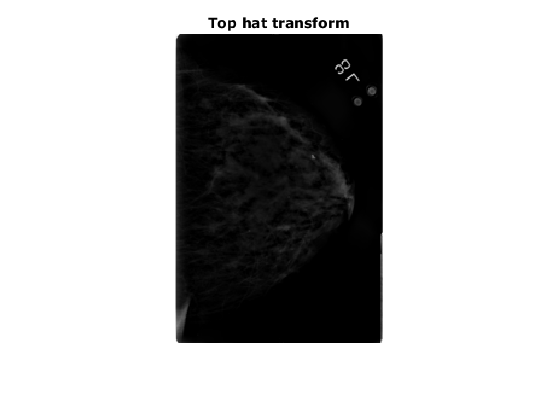

In [4]:
% top hat transform, output: thf
se = strel('disk', 15);
thf = imtophat(G, se);
imshow(thf, []);
title("Top hat transform");

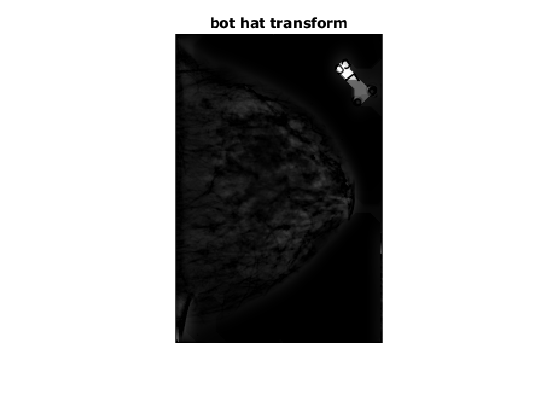

In [5]:
% bot-hat transform, output: bhf
bhf = imbothat(G, se);
imshow(bhf, []);
title("bot hat transform")

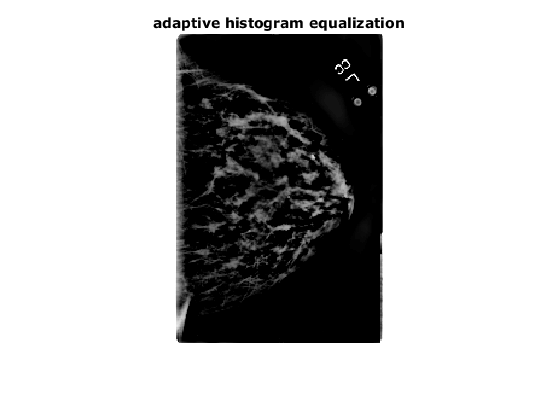

In [6]:
% adaptive histogram equalization, output: HE
enimage = (G + thf) - bhf;
HE = adapthisteq(enimage);
imshow(HE, []);
title("adaptive histogram equalization");